In [318]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib 
%matplotlib inline

In [319]:
train = pd.read_csv('./dataset/train.csv')

In [320]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [322]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [323]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [324]:
import matplotlib.pyplot as plt

In [325]:
fig = plt.figure()
fig.set(alpha=0.2)

[None]

<Figure size 432x288 with 0 Axes>

In [326]:
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\STFANGSO.TTF')

Text(0, 0.5, '人数')

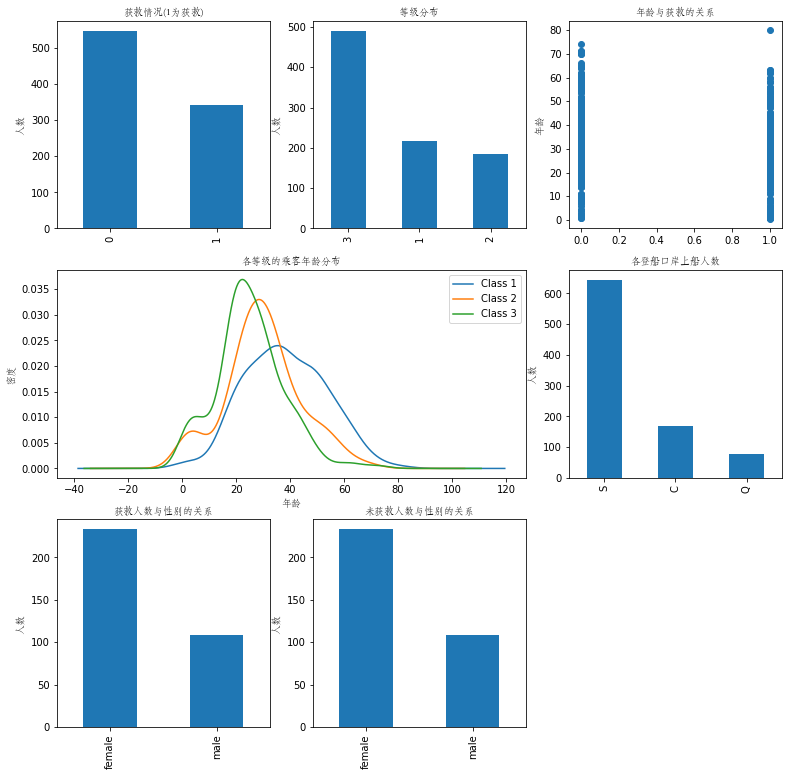

In [327]:
plt.figure(figsize=(13,13))
plt.subplot2grid((3,3),(0,0))
train.Survived.value_counts().plot(kind='bar')
plt.title(u"获救情况(1为获救)",fontproperties=zhfont1)
plt.ylabel(u"人数",fontproperties=zhfont1)

plt.subplot2grid((3,3),(0,1))
train['Pclass'].value_counts().plot(kind='bar')
plt.title("等级分布",fontproperties=zhfont1)
plt.ylabel("人数",fontproperties=zhfont1)

plt.subplot2grid((3,3),(0,2))
plt.scatter(train['Survived'],train['Age'])
plt.ylabel("年龄",fontproperties=zhfont1)
plt.title("年龄与获救的关系",fontproperties=zhfont1)

plt.subplot2grid((3,3),(1,0),colspan=2)
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')
plt.xlabel("年龄",fontproperties=zhfont1)
plt.ylabel("密度",fontproperties=zhfont1) 
plt.title("各等级的乘客年龄分布",fontproperties=zhfont1)
plt.legend(('Class 1', 'Class 2','Class 3'),loc='best')

plt.subplot2grid((3,3),(1,2))
train['Embarked'].value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数",fontproperties=zhfont1)
plt.ylabel("人数",fontproperties=zhfont1)

plt.subplot2grid((3,3),(2,0))
train['Sex'][train['Survived'] == 1].value_counts().plot(kind='bar')
plt.title("获救人数与性别的关系",fontproperties=zhfont1)
plt.ylabel("人数",fontproperties=zhfont1)

plt.subplot2grid((3,3),(2,1))
train['Sex'][train['Survived'] == 1].value_counts().plot(kind='bar')
plt.title("未获救人数与性别的关系",fontproperties=zhfont1)
plt.ylabel("人数",fontproperties=zhfont1)

1.年龄对获救概论有影响
2.性别对获救概论有影响
3.船舱级别对获救概论有影响
4.登船港口与获救概论的关系？

## 年龄与获救概论的关系

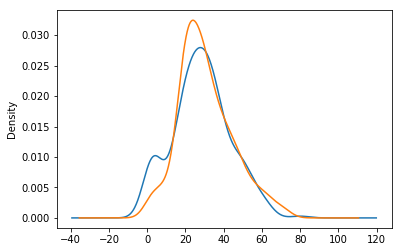

In [328]:
train['Age'][train['Survived'] == 1].plot(kind='kde')
train['Age'][train['Survived'] == 0].plot(kind='kde')

## 船舱等级与获救概论的关系

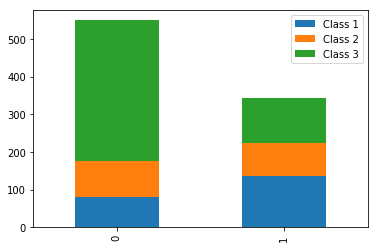

In [329]:
sur_1 = train['Survived'][train['Pclass'] == 1].value_counts()
sur_2 = train['Survived'][train['Pclass'] == 2].value_counts()
sur_3 = train['Survived'][train['Pclass'] == 3].value_counts()
df = pd.DataFrame({'Class 1':sur_1,'Class 2':sur_2,'Class 3':sur_3})
df.plot(kind='bar',stacked=True)

## 从下图中可以看出class 3的获救概率最高，class 1的获救概论最低，故船舱等级与获救概论有关

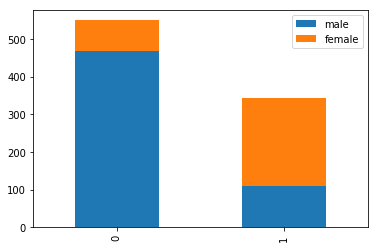

In [330]:
male = train['Survived'][train['Sex']=='male'].value_counts()
female = train['Survived'][train['Sex']=='female'].value_counts()
df = pd.DataFrame({'male':male,'female':female})
df.plot(kind='bar',stacked=True)

#从下图可以看出，女性的获救概论明显高于男性，故获救概论与性别有关

# 详细版船舱等级及性别与获救概论之间的关系

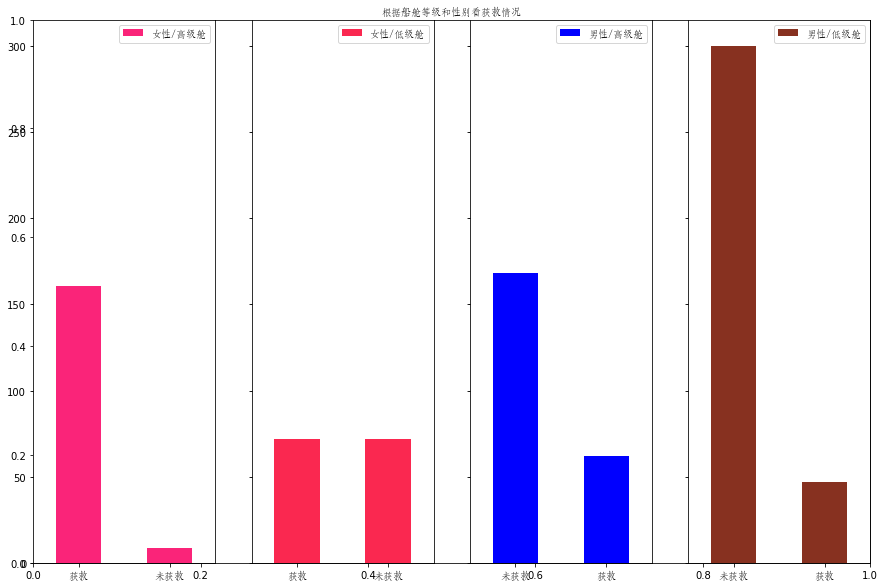

In [331]:
fig = plt.figure(figsize=(15,10))
fig.set(alpha = 0.65)
plt.title("根据船舱等级和性别看获救情况",fontproperties=zhfont1)

ax1 = fig.add_subplot(141)
train['Survived'][train['Sex'] == 'female'][train['Pclass'] != 3].value_counts().plot(kind='bar',color='#FA2479')
ax1.legend(["女性/高级舱"], loc='best',prop=zhfont1)
ax1.set_xticklabels(["获救","未获救"],rotation=0,fontproperties=zhfont1)
ax2 = fig.add_subplot(142,sharey=ax1)
train['Survived'][train['Sex'] == 'female'][train['Pclass'] ==3].value_counts().plot(kind='bar',color='#FA2850')
ax2.set_xticklabels(["获救","未获救"],rotation=0,fontproperties=zhfont1)
plt.legend(["女性/低级舱"], loc='best',prop=zhfont1)

ax3 = fig.add_subplot(143,sharey=ax1)
train['Survived'][train['Sex'] != 'female'][train['Pclass'] != 3].value_counts().plot(kind='bar',color='blue')
ax3.set_xticklabels(["未获救","获救"],rotation=0,fontproperties=zhfont1)
plt.legend(["男性/高级舱"], loc='best',prop=zhfont1)
ax4 = fig.add_subplot(144,sharey=ax1)
train['Survived'][train['Sex'] != 'female'][train['Pclass'] ==3].value_counts().plot(kind='bar',color='#873120')
ax4.set_xticklabels(["未获救","获救"],rotation=0,fontproperties=zhfont1)
plt.legend(["男性/低级舱"], loc='best',prop=zhfont1)

Text(0, 0.5, '人数')

<Figure size 432x288 with 0 Axes>

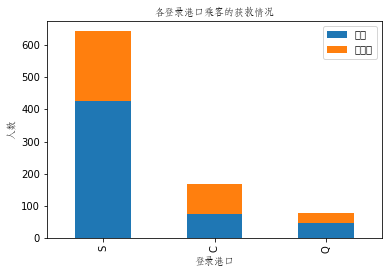

In [332]:
fig = plt.figure()
fig.set(alpha=0.2)

sur_0 = train["Embarked"][train['Survived'] == 1].value_counts()
sur_1 = train["Embarked"][train['Survived'] == 0].value_counts()
df = pd.DataFrame({"获救":sur_1,"未获救":sur_0})
df.plot(kind='bar',stacked=True)
plt.title("各登录港口乘客的获救情况",fontproperties=zhfont1)
plt.xlabel("登录港口",fontproperties=zhfont1) 
plt.ylabel("人数",fontproperties=zhfont1) 

In [333]:
g = train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [334]:
g = train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)


                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [335]:
train['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F2                 3
F33                3
E101               3
C22 C26            3
D                  3
E8                 2
D35                2
B49                2
B57 B59 B63 B66    2
B51 B53 B55        2
C126               2
B58 B60            2
B28                2
C2                 2
E24                2
C123               2
C125               2
C83                2
C68                2
C124               2
E67                2
D17                2
B77                2
C65                2
C52                2
F4                 2
D20                2
                  ..
A26                1
C99                1
E36                1
B79                1
A19                1
C45                1
C148               1
E68                1
B86                1
B73                1
C106               1
C47                1
A6                 1
E46                1
F G63              1
C7                 1
B80          

因为Cabin缺失值过多，不好处理，
先以有无Cabin值为条件看一下获救概论

Text(0, 0.5, '人数')

<Figure size 432x288 with 0 Axes>

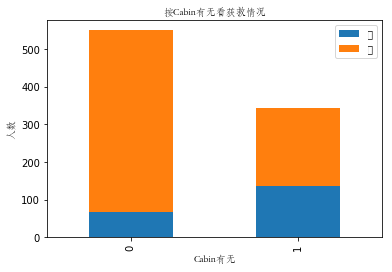

In [336]:

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

cabin = train['Survived'][pd.notnull(train['Cabin'])].value_counts()

cabinno = train['Survived'][pd.isnull(train['Cabin'])].value_counts()

df=pd.DataFrame({'有':cabin, '无':cabinno})
df.plot(kind='bar', stacked=True)
plt.title("按Cabin有无看获救情况",fontproperties=zhfont1)
plt.xlabel("Cabin有无",fontproperties=zhfont1) 
plt.ylabel("人数",fontproperties=zhfont1)

## 完成了数据展示，观察数据之间的关系，做出合理假设，找出与获救概论有关的特征

## 数据预处理（特征工程的重要性）

对于数据的缺失值处理，看缺失值所在特征的缺失情况，如缺失过多，舍弃最好，不然会带入noise，影响最后结果
如果缺失样本适中，看特征值为离散型与连续型，离散型，可把NAN作为一个新的类别加入，若为连续型，可以先选取适当step，将该特征离散化，然后将NaN作为新的类别加入。
有些情况，缺失值个数不多，可根据已有的值，拟合一下数据，补上。

In [337]:
#在本实验中，我采用scikit-learn中的RandomForset来拟合缺失数据的年龄

from sklearn.ensemble import RandomForestRegressor

In [338]:
def set_missing_ages(df):
    #将已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    #将乘客分为已知年龄和未知年龄两部分
    
    know_age = age_df[age_df['Age'].notnull()].as_matrix()
    unknow_age = age_df[age_df['Age'].isnull()].as_matrix()
    
    #y即目标年龄
    y = know_age[:,0]
    
    #X即特征属性值
    X = know_age[:,1:]
    
    # fit到RandomForestRegressor之中
    rft = RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1)
    rft.fit(X,y)
    
    #用得到的模型进行未知年龄结果预测
    predictedAges = rft.predict(unknow_age[:,1::])
    
    #用得到的预测结果填补原缺失数据
    df.loc[(df['Age'].isnull()),'Age'] = predictedAges
    
    return df,rft

def set_Cabin_type(df):
    df.loc[(df['Cabin'].notnull()),'Cabin'] = 'Yes'
    df.loc[(df['Cabin'].isnull()),'Cabin'] = 'No'
    return df

train,rft = set_missing_ages(train)
train = set_Cabin_type(train)

C:\Users\a2501\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\a2501\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [339]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


逻辑回归模型建模时，需要输入的特征都是数值型特征，通常需要对类目型的特征进行因子化。

pandas中的'get_dummies'来完成这个工作，并拼接在原来的’data_train'之上

In [340]:
dummies_Cabin = pd.get_dummies(train['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(train['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(train['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(train['Pclass'],prefix='Pclass')


df = pd.concat([train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis = 1,sort=True)#在原本的数据中添加因子化的列
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis = 1,inplace=True) #删除多余的列

In [341]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.140038,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [342]:
# Age 与Fare的数据变化范围太大，影响收敛速度，故将其标准化

In [343]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()

In [344]:
#fit()与fit_transform()方法中需要的是二维数组，而df['Fare']是元组类型，故需要转换成二维数组

fare_scale_param = scaler.fit(np.array(df['Fare']).reshape(1,-1))
df['Fare_scaled'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1,1),fare_scale_param)

age_scale_param = scaler.fit(np.array(df['Age']).reshape(1,-1))
df['Age_scaled'] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1),age_scale_param)

In [345]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Fare_scaled,Age_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.502445,-0.561721
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.786845,0.612381
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.488854,-0.268196
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.420730,0.392237
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,-0.486337,0.392237


## 数据处理完毕，开始建模

In [346]:
from sklearn import linear_model

In [347]:
# 用正则取出需要的属性值

train_df = df.filter(regex='Survived|Age_.*|Pclass_.*|Fare_.*|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*')

In [348]:
train_df

,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Fare_scaled,Age_scaled
0,0,1,0,1,0,0,0,1,0,1,0,0,1,-0.502445,-0.561721
1,1,1,0,0,1,1,0,0,1,0,1,0,0,0.786845,0.612381
2,1,0,0,1,0,0,0,1,1,0,0,0,1,-0.488854,-0.268196
3,1,1,0,0,1,0,0,1,1,0,1,0,0,0.420730,0.392237
4,0,0,0,1,0,0,0,1,0,1,0,0,1,-0.486337,0.392237
5,0,0,0,1,0,0,1,0,0,1,0,0,1,-0.478116,-0.478064
6,0,0,0,0,1,0,0,1,0,1,1,0,0,0.395814,1.786484
7,0,3,1,1,0,0,0,1,0,1,0,0,1,-0.224083,-2.029350
8,1,0,2,1,0,0,0,1,1,0,0,0,1,-0.424256,-0.194814
9,1,1,0,1,0,1,0,0,1,0,0,1,0,-0.042956,-1.148773


In [349]:
#转成数组形式
train_np = train_df.values

In [380]:
train_np

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.50244517, -0.5617215 ],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.78684529,  0.61238101],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.48885426, -0.26819587],
       ...,
       [ 0.        ,  1.        ,  2.        , ...,  1.        ,
        -0.17626324, -1.05578584],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.04438104, -0.26819587],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49237783,  0.17209257]])

In [381]:
# 取出Survived作为目标值
y = train_np[:,0]

In [382]:
# X 即为特征属性值
X = train_np[:,1:]

In [383]:
X

array([[ 1.        ,  0.        ,  1.        , ...,  1.        ,
        -0.50244517, -0.5617215 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.78684529,  0.61238101],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.48885426, -0.26819587],
       ...,
       [ 1.        ,  2.        ,  1.        , ...,  1.        ,
        -0.17626324, -1.05578584],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.04438104, -0.26819587],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.49237783,  0.17209257]])

In [384]:
clf = linear_model.LogisticRegression(C = 1.0,penalty='l1',tol=1e-6)

In [385]:
clf.fit(X,y)

C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

In [386]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

## 生成训练模型后，不能忘记测试集数据需要做与训练集数据一样的数据预处理工作

In [387]:
test = pd.read_csv('./dataset/test.csv')

In [388]:
test.loc[(test['Fare'].isnull()),'Fare'] = 0

In [389]:
test,rft = set_missing_ages(test)
test = set_Cabin_type(test)

C:\Users\a2501\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\a2501\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [390]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,No,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,No,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,No,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,No,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,No,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,No,S
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,No,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,No,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,No,C
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,No,S


In [391]:
dummies_Cabin = pd.get_dummies(test['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(test['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(test['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(test['Pclass'],prefix='Pclass')


test_df = pd.concat([test,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis = 1,sort=True)#在原本的数据中添加因子化的列
test_df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis = 1,inplace=True) #删除多余的列

In [392]:
test_df

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1


In [393]:
scaler = preprocessing.StandardScaler()

fare_scale_param = scaler.fit(np.array(test_df['Fare']).reshape(1,-1))
test_df['Fare_scaled'] = scaler.fit_transform(np.array(test_df['Fare']).reshape(-1,1),fare_scale_param)

age_scale_param = scaler.fit(np.array(test_df['Age']).reshape(1,-1))
test_df['Age_scaled'] = scaler.fit_transform(np.array(test_df['Age']).reshape(-1,1),age_scale_param)

In [394]:
test_df.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Fare_scaled,Age_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,-0.496637,0.368165
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,-0.511497,1.332905
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,-0.463335,2.490594
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.481704,-0.210679
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.416740,-0.596575


In [395]:
test  =test_df.filter(regex='Survived|Age_.*|Pclass_.*|Fare_.*|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*')

In [396]:
pre = clf.predict(test)

In [397]:
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].values,'Survived':pre.astype(np.int32)})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [398]:
result.to_csv("logistic_regression_predictions.csv",index = False)

## 画出学习曲线

In [399]:
from sklearn.model_selection import learning_curve

In [400]:
# 用sklearn的learing_curve得到learning_score,cv_score
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,
                                                         train_sizes=train_sizes,verbose=verbose)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff


C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default s

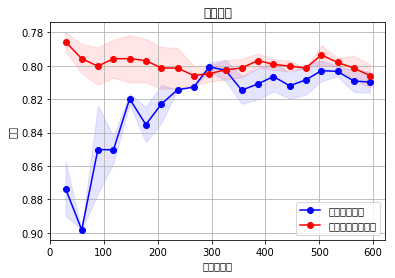

(0.8074905006044848, 0.017145791339090666)

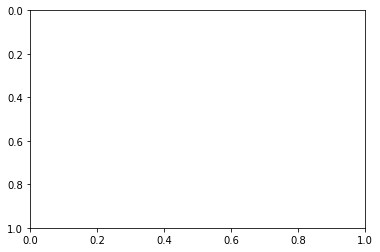

In [401]:
plot_learning_curve(clf, u"学习曲线", X, y)

## 完成baseline  model 需要进行参数优化，研究过拟合问题

In [374]:
pd.DataFrame({'columns':list(train_df.columns)[1:],"coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.34321405501878616]
1,Parch,[-0.10561244592847037]
2,Cabin_No,[-0.25742944156575465]
3,Cabin_Yes,[0.6458643509658439]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.4167566315959037]
7,Sex_female,[2.212774302930683]
8,Sex_male,[-0.4207690143621203]
9,Pclass_1,[0.3367451523321009]


coef为正时代表与最终结果为正相关，数值越大，相关度越高

Cabin_Yes 很大程度上拉高了获救概率（从现实角度考虑这个是不合理的，Cabin_Yes的乘客有一部分也遇难了，而Cabin_No的乘客也有获救的）

Pclass_l拉高了获救概论，船舱等级越低获救概论越低
Sex_female 拉高了获救概论，毕竟女士和小孩优先
Age_scaled 与结果是负相关，表明年龄越小，获救概论越大
登船港口S与获救概论是负相关，（但是从之间的统计图中可以看出三个港口的获救概论差不多，可以考虑把港口这个feature去掉！）

为了对以上的假设进行验证，我们需要进行交叉验证（cross validation） 把train.csv分成两部分，一部分用于训练模型，一部分用于看预测效果

In [375]:
from sklearn import model_selection

In [376]:
clf = linear_model.LogisticRegression(C = 1.0,penalty='l1',tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|Pclass_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*')
X = all_data.values[:,1:]
y = all_data.values[:,0]

In [377]:
av_score = model_selection.cross_val_score(clf,X,y,cv=10)
av_score

C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.82222222, 0.81111111, 0.78651685, 0.84269663, 0.80898876,
       0.76404494, 0.78651685, 0.79775281, 0.80898876, 0.81818182])

拿出交叉验证中的bad case，人眼审查看看能否发现什么蛛丝马迹

In [197]:
# 分割数据，按照 训练数据：cv数据 = 7：3的比例
split_train,split_cv = model_selection.train_test_split(df,test_size=0.3,random_state=14)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

#生成模型
clf = linear_model.LogisticRegression(C = 1.0,penalty='l1',tol=1e-6)
clf.fit(train_df.values[:,1:],train_df.values[:,0])

#对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
pre = clf.predict(cv_df.values[:,1:])

orgin_data_train = pd.read_csv('./dataset/train.csv')
bad_cases = orgin_data_train.loc[orgin_data_train['PassengerId'].isin(split_cv[pre != cv_df.values[:,0]]['PassengerId'].values)]

C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [198]:
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S


 分析 bad case 列出可能的优化假设，比如年龄的取值方式，当名字中有mrs时Parch又不为0，我们猜测她可能是一位母亲。

In [274]:
train = pd.read_csv('./dataset/train.csv')

In [275]:
train[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [276]:
# 利用性别age的均值来填充age
female_age = np.mean(train['Age'][train['Sex'] == 'female'])
male_age = np.mean(train['Age'][train['Sex'] == 'male'])


for index,row in train.iterrows():
    if row['Age'] != row['Age']: # NAN更像一个float类型的数据，在python中判断NAN只需要判断它是否自身相等
        if row['Sex'] == 'female':
            row['Age'] = female_age
        else:
            row['Age'] = male_age
    train.loc[index] = row

In [277]:
train['FamSize'] = train['SibSp'].values + train['Parch']

In [278]:

dummies_Embarked = pd.get_dummies(train['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(train['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(train['Pclass'],prefix='Pclass')


df = pd.concat([train,dummies_Embarked,dummies_Sex,dummies_Pclass],axis = 1,sort=True)#在原本的数据中添加因子化的列
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch'],axis = 1,inplace=True) #删除多余的列

#fit()与fit_transform()方法中需要的是二维数组，而df['Fare']是元组类型，故需要转换成二维数组
scaler = preprocessing.StandardScaler()
fare_scale_param = scaler.fit(np.array(df['Fare']).reshape(1,-1))
df['Fare_scaled'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1,1),fare_scale_param)

age_scale_param = scaler.fit(np.array(df['Age']).reshape(1,-1))
df['Age_scaled'] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1),age_scale_param)

In [279]:
df.head()

,PassengerId,Survived,Age,Fare,FamSize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Fare_scaled,Age_scaled
0,1,0,22.0,7.2500,1,0,0,1,0,1,0,0,1,-0.502445,-0.594732
1,2,1,38.0,71.2833,1,1,0,0,1,0,1,0,0,0.786845,0.635319
2,3,1,26.0,7.9250,0,0,0,1,1,0,0,0,1,-0.488854,-0.287220
3,4,1,35.0,53.1000,1,0,0,1,1,0,1,0,0,0.420730,0.404684
4,5,0,35.0,8.0500,0,0,0,1,0,1,0,0,1,-0.486337,0.404684


In [295]:
train_df = df.filter(regex='Survived|Age_.*|FamSize|Sex_.*|Pclass_.*|Fare_.*')
train_np = train_df.values

In [296]:
X = train_np[:,1:]
y = train_np[:,0]

In [304]:
clf = linear_model.LogisticRegression(C = 1.0,penalty='l1',tol=1e-6)
clf.fit(X,y)

C:\Users\a2501\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

In [305]:
test_df['FamSize'] =  test_df['SibSp'].values + test_df['Parch'].values
test=test_df.filter(regex='Age_.*|FamSize|Sex_.*|Pclass_.*|Fare_.*')

pre = clf.predict(test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].values,'Survived':pre.astype(np.int32)})

result.to_csv('Logist_pre_2.csv',index=False)

In [303]:
result

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,0
5,897,1
6,898,1
7,899,1
8,900,1
9,901,1


## 模型融合(选出最佳训练器)

In [402]:
from sklearn.ensemble import BaggingRegressor

In [403]:
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

In [404]:
y  = train_np[:,0]

X = train_np[:,1:]

clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)

In [405]:
bagging_clf = BaggingRegressor(clf,n_estimators=20,max_samples=0.8,
                              max_features=1.0,bootstrap=True,bootstrap_features=False,
                              n_jobs=-1)

In [406]:
bagging_clf.fit(X,y)

BaggingRegressor(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=20, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [410]:
test = test_df.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)
